<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Milestone%20Projects/Milestone_Project_3_Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-29 17:52:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-03-29 17:52:49 (7.24 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
dataset = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = 
                      [ 'Date'],index_col = ['Date'])

In [4]:
dataset

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
dataset.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
len(dataset)

2787

In [8]:
bitcoin_prices = pd.DataFrame(dataset['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})

In [9]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, '1 Oct 2018 to 18 May 2021')

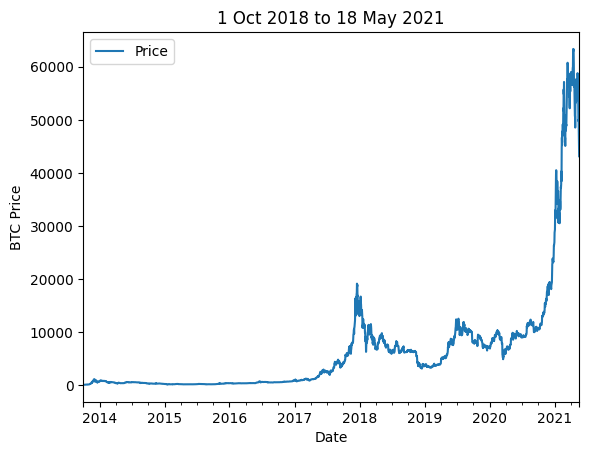

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("1 Oct 2018 to 18 May 2021")

<Axes: xlabel='Date'>

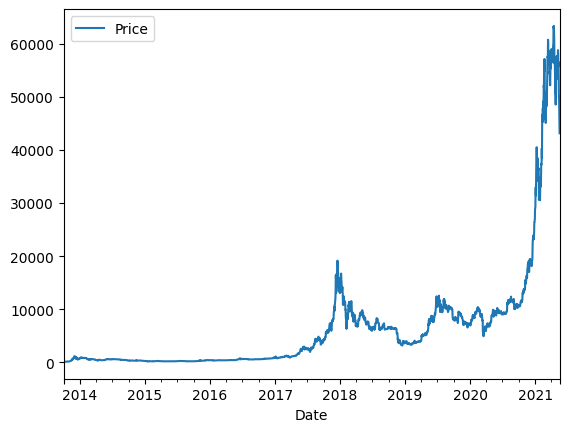

In [11]:
bitcoin_prices.plot()

### Importing with CSV Module

In [12]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  reader = csv.reader(f,delimiter = ",")
  next(reader)
  for line in reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [13]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

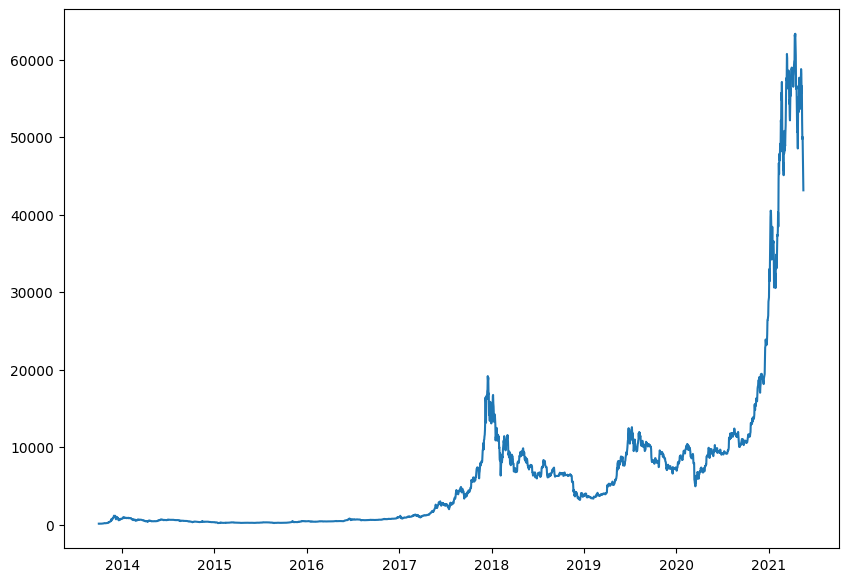

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)

### Creating train and test sets with time series data (Wrong Way)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [17]:
timesteps,prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(timesteps,prices,test_size = 0.2)

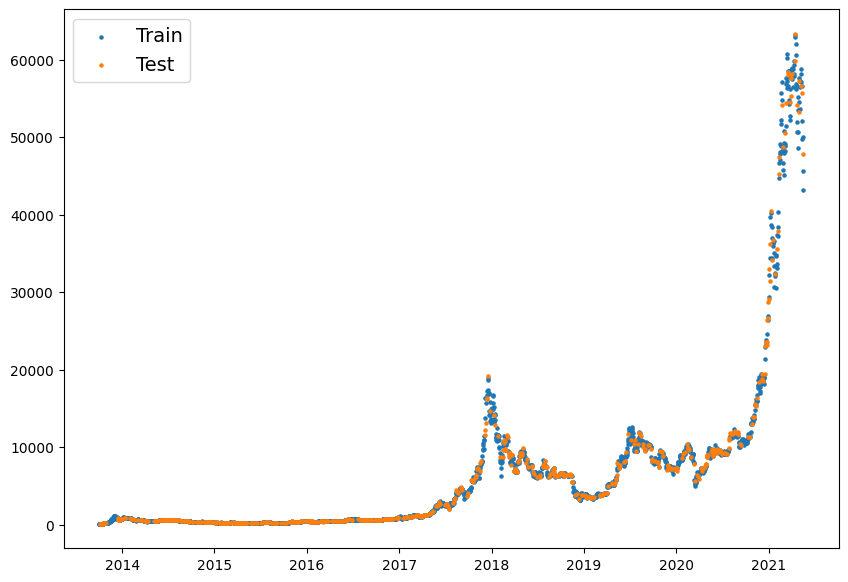

In [19]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating splits for time series (right way)

In [20]:
split_size = int(0.8*len(prices))
x_train,y_train = timesteps[:split_size],prices[:split_size]
x_test,y_test  = timesteps[split_size:],prices[split_size:]

In [21]:
len(x_train),len(x_test)

(2229, 558)

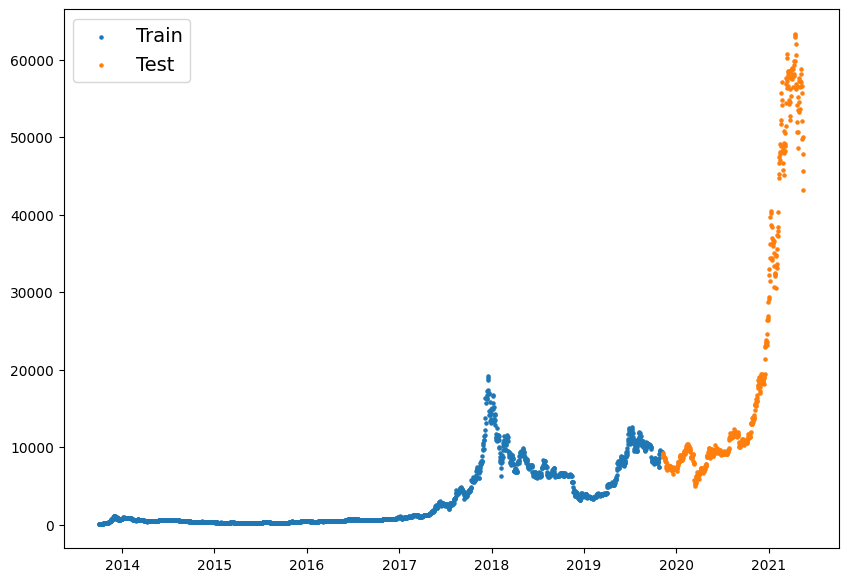

In [22]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating plot functions

In [23]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Model 0 - Naive Baselline

In [24]:
naive_forecast = y_test[:-1]

In [25]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [26]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

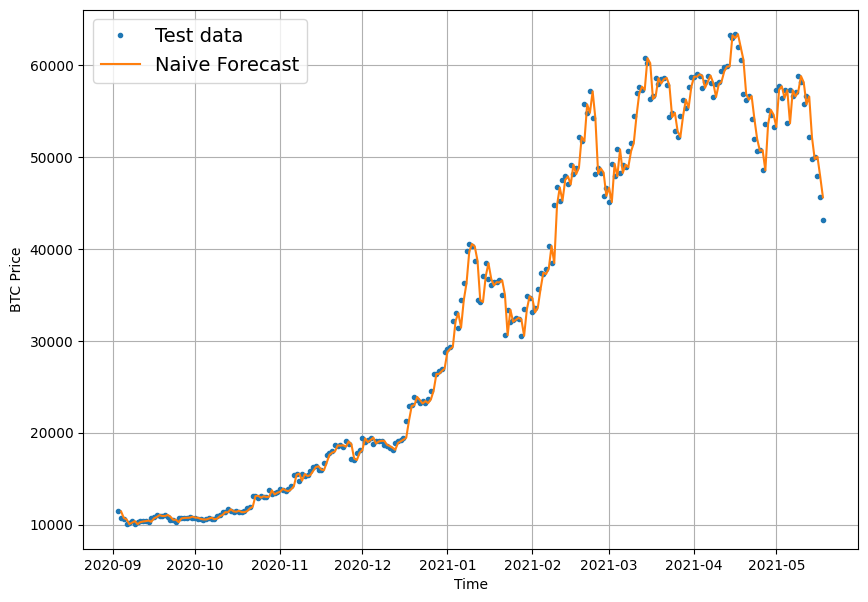

In [27]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive Forecast")

In [28]:
import tensorflow as tf

In [29]:
# MASE Implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [30]:
mean_absolute_scaled_error(y_true = y_test[1:],y_pred = naive_forecast).numpy()

0.9995699939182624

In [71]:
def evaluation_metrics(y_pred,y_true):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"mae":mae.numpy(),"mse":mse.numpy(),"rmse":rmse.numpy(),"mape":mape.numpy(),"mase":mase.numpy()}


In [32]:
naive_results = evaluation_metrics(y_test[1:],naive_forecast)

In [33]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.527042,
 'mase': 1.0060278}

In [34]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [35]:
tf.reduce_min(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>

## Windowing dataset

In [36]:
HORIZON = 1 #Predict 1 Day
WINDOW = 7 #Use past week of Bitcoin data to one predictor


In [37]:
def get_labelled_window(x,horizon = HORIZON):
  '''
    Create Labels for windowed dataset.
    E.g. If Horizon = 1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6] -> [7]) Window Size = 7
  '''
  return x[:,:-horizon],x[:,-horizon:]

In [38]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))

In [39]:
tf.expand_dims(tf.range(8)+1,axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [40]:
print("Window : {x} -> Label: {y}".format(x = tf.squeeze(test_window).numpy(),y = tf.squeeze(test_label).numpy()))

Window : [1 2 3 4 5 6 7] -> Label: 8


## Preprocessing Functions for Windowed Data

In [41]:
import numpy as np

In [42]:
def make_windows(x,window_size =  WINDOW,horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)
  window_indexes = window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T
  windowed_array = x[window_indexes]
  
  windows,labels = get_labelled_window(windowed_array,horizon = HORIZON)
  return windows,labels

In [43]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW,horizon = HORIZON)

In [44]:
for i in range(3):
  print(full_windows[i],"->",full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


## Turning windows into Training and Test Sets

In [45]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [46]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

## Making modelling checkpoint

In [47]:
import os
def create_model_checkpoint(model_name,save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),verbose=0,save_best_only = True)

## Model 1 - Dense Model

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

In [49]:
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_1_dense")

model_1.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [50]:
history_1 = model_1.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_1.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 1:21 - loss: 4444.3599 - mae: 4444.3599

18/18 [==============================] - 6s 45ms/step - loss: 2187.1492 - mae: 2187.1492 - val_loss: 1001.0999 - val_mae: 1001.0999
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 388.9658 - mae: 388.9658 - val_loss: 1976.9642 - val_mae: 1976.9642
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 237.1223 - mae: 237.1223 - val_loss: 1107.3744 - val_mae: 1107.3744
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 214.4690 - mae: 214.4690

18/18 [==============================] - 0s 26ms/step - loss: 179.3120 - mae: 179.3120 - val_loss: 981.7230 - val_mae: 981.7230
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 157.3664 - mae: 157.3664

18/18 [==============================] - 1s 37ms/step - loss: 169.4578 - mae: 169.4578 - val_loss: 933.2043 - val_mae: 933.2043
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 122.8714 - mae: 122.8714

18/18 [==============================] - 1s 45ms/step - loss: 164.4646 - mae: 164.4646 - val_loss: 925.1267 - val_mae: 925.1267
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 167.0515 - mae: 167.0515

18/18 [==============================] - 1s 51ms/step - loss: 158.8447 - mae: 158.8447 - val_loss: 892.2592 - val_mae: 892.2592
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 151.8230 - mae: 151.8230

18/18 [==============================] - 1s 47ms/step - loss: 153.6735 - mae: 153.6735 - val_loss: 846.1289 - val_mae: 846.1289
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 152.7443 - mae: 152.7443 - val_loss: 887.3740 - val_mae: 887.3740
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 147.1617 - mae: 147.1617

18/18 [==============================] - 1s 50ms/step - loss: 148.7849 - mae: 148.7849 - val_loss: 810.2421 - val_mae: 810.2421
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 143.3427 - mae: 143.3427

18/18 [==============================] - 1s 53ms/step - loss: 144.6412 - mae: 144.6412 - val_loss: 798.5719 - val_mae: 798.5719
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 141.5453 - mae: 141.5453 - val_loss: 821.7798 - val_mae: 821.7798
Epoch 13/100
18/18 [==============================] - 0s 14ms/step - loss: 140.9271 - mae: 140.9271 - val_loss: 825.9623 - val_mae: 825.9623
Epoch 14/100
10/18 [===============>..............] - ETA: 0s - loss: 134.9579 - mae: 134.9579

18/18 [==============================] - 2s 107ms/step - loss: 137.1141 - mae: 137.1141 - val_loss: 796.0253 - val_mae: 796.0253
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 136.4800 - mae: 136.4800

18/18 [==============================] - 1s 67ms/step - loss: 135.3628 - mae: 135.3628 - val_loss: 750.8455 - val_mae: 750.8455
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 130.1283 - mae: 130.1283

18/18 [==============================] - 1s 54ms/step - loss: 131.1119 - mae: 131.1119 - val_loss: 750.1469 - val_mae: 750.1469
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 129.4122 - mae: 129.4122 - val_loss: 792.5263 - val_mae: 792.5263
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 135.2086 - mae: 135.2086

18/18 [==============================] - 1s 53ms/step - loss: 129.5871 - mae: 129.5871 - val_loss: 742.5085 - val_mae: 742.5085
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 125.7273 - mae: 125.7273 - val_loss: 743.7250 - val_mae: 743.7250
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 127.7977 - mae: 127.7977

18/18 [==============================] - 1s 55ms/step - loss: 125.7198 - mae: 125.7198 - val_loss: 687.6529 - val_mae: 687.6529
Epoch 21/100
18/18 [==============================] - 0s 10ms/step - loss: 127.5433 - mae: 127.5433 - val_loss: 690.1424 - val_mae: 690.1424
Epoch 22/100
12/18 [===================>..........] - ETA: 0s - loss: 132.7822 - mae: 132.7822

18/18 [==============================] - 1s 57ms/step - loss: 121.3713 - mae: 121.3713 - val_loss: 676.0783 - val_mae: 676.0783
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 119.9813 - mae: 119.9813

18/18 [==============================] - 1s 47ms/step - loss: 121.0851 - mae: 121.0851 - val_loss: 652.8974 - val_mae: 652.8974
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3262 - mae: 122.3262

18/18 [==============================] - 1s 61ms/step - loss: 120.9652 - mae: 120.9652 - val_loss: 649.6240 - val_mae: 649.6240
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 125.5557 - mae: 125.5557

18/18 [==============================] - 1s 52ms/step - loss: 119.4155 - mae: 119.4155 - val_loss: 643.6303 - val_mae: 643.6303
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 122.6419 - mae: 122.6419

18/18 [==============================] - 1s 69ms/step - loss: 119.7515 - mae: 119.7515 - val_loss: 642.0912 - val_mae: 642.0912
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 119.3723 - mae: 119.3723

18/18 [==============================] - 2s 118ms/step - loss: 119.8412 - mae: 119.8412 - val_loss: 637.5519 - val_mae: 637.5519
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 116.2464 - mae: 116.2464

18/18 [==============================] - 2s 90ms/step - loss: 116.7598 - mae: 116.7598 - val_loss: 632.2211 - val_mae: 632.2211
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 115.7437 - mae: 115.7437 - val_loss: 656.6545 - val_mae: 656.6545
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 122.4905 - mae: 122.4905 - val_loss: 643.7916 - val_mae: 643.7916
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 120.3624 - mae: 120.3624 - val_loss: 682.7073 - val_mae: 682.7073
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 119.3443 - mae: 119.3443

18/18 [==============================] - 1s 55ms/step - loss: 119.3443 - mae: 119.3443 - val_loss: 620.0521 - val_mae: 620.0521
Epoch 33/100
18/18 [==============================] - 0s 13ms/step - loss: 115.6944 - mae: 115.6944 - val_loss: 636.5530 - val_mae: 636.5530
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 114.7798 - mae: 114.7798

18/18 [==============================] - 1s 44ms/step - loss: 115.3929 - mae: 115.3929 - val_loss: 616.7942 - val_mae: 616.7942
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7642 - mae: 105.7642

18/18 [==============================] - 0s 27ms/step - loss: 113.7441 - mae: 113.7441 - val_loss: 610.8995 - val_mae: 610.8995
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9244 - mae: 117.9244 - val_loss: 614.8936 - val_mae: 614.8936
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1941 - mae: 142.1941

18/18 [==============================] - 0s 27ms/step - loss: 113.7276 - mae: 113.7276 - val_loss: 606.0810 - val_mae: 606.0810
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 101.4691 - mae: 101.4691

18/18 [==============================] - 0s 26ms/step - loss: 113.2944 - mae: 113.2944 - val_loss: 601.8790 - val_mae: 601.8790
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5677 - mae: 127.5677

18/18 [==============================] - 0s 27ms/step - loss: 112.3668 - mae: 112.3668 - val_loss: 599.9116 - val_mae: 599.9116
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3577 - mae: 111.3577 - val_loss: 600.1616 - val_mae: 600.1616
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 112.6632 - mae: 112.6632

18/18 [==============================] - 0s 27ms/step - loss: 111.7699 - mae: 111.7699 - val_loss: 596.5175 - val_mae: 596.5175
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0395 - mae: 115.0395 - val_loss: 670.4932 - val_mae: 670.4932
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6124 - mae: 119.6124 - val_loss: 664.5755 - val_mae: 664.5755
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 124.4732 - mae: 124.4732 - val_loss: 703.5139 - val_mae: 703.5139
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6913 - mae: 115.6913 - val_loss: 599.5844 - val_mae: 599.5844
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 83.2863 - mae: 83.2863

18/18 [==============================] - 0s 26ms/step - loss: 111.6520 - mae: 111.6520 - val_loss: 588.8996 - val_mae: 588.8996
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0591 - mae: 110.0591 - val_loss: 637.6286 - val_mae: 637.6286
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7220 - mae: 110.7220 - val_loss: 592.4387 - val_mae: 592.4387
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1756 - mae: 112.1756 - val_loss: 666.5994 - val_mae: 666.5994
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0938 - mae: 118.0938 - val_loss: 592.1577 - val_mae: 592.1577
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9281 - mae: 109.9281 - val_loss: 596.6331 - val_mae: 596.6331
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6446 - mae: 111.6446 - val_loss: 593.4297 - val_mae: 593.4297
Epoch 53/100
18/18 [============

18/18 [==============================] - 0s 27ms/step - loss: 121.8006 - mae: 121.8006 - val_loss: 578.7882 - val_mae: 578.7882
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2658 - mae: 109.2658 - val_loss: 594.5129 - val_mae: 594.5129
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9504 - mae: 109.9504 - val_loss: 594.2709 - val_mae: 594.2709
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4712 - mae: 108.4712 - val_loss: 578.9770 - val_mae: 578.9770
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 72.2716 - mae: 72.2716

18/18 [==============================] - 0s 25ms/step - loss: 107.6666 - mae: 107.6666 - val_loss: 576.6147 - val_mae: 576.6147
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7209 - mae: 109.7209 - val_loss: 637.4407 - val_mae: 637.4407
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7059 - mae: 110.7059 - val_loss: 608.7584 - val_mae: 608.7584
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2004 - mae: 111.2004 - val_loss: 577.5939 - val_mae: 577.5939
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 112.1917 - mae: 112.1917

18/18 [==============================] - 0s 26ms/step - loss: 107.7437 - mae: 107.7437 - val_loss: 575.3866 - val_mae: 575.3866
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0108 - mae: 107.0108 - val_loss: 673.1882 - val_mae: 673.1882
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0127 - mae: 110.0127 - val_loss: 577.3849 - val_mae: 577.3849
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3684 - mae: 113.3684 - val_loss: 692.7337 - val_mae: 692.7337
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 121.9415 - mae: 121.9415 - val_loss: 612.0161 - val_mae: 612.0161
Epoch 71/100
16/18 [=========================>....] - ETA: 0s - loss: 108.6085 - mae: 108.6085

18/18 [==============================] - 1s 30ms/step - loss: 111.8187 - mae: 111.8187 - val_loss: 572.4950 - val_mae: 572.4950
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1791 - mae: 110.1791 - val_loss: 573.3701 - val_mae: 573.3701
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7405 - mae: 110.7405 - val_loss: 573.5491 - val_mae: 573.5491
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3593 - mae: 109.3593 - val_loss: 595.2542 - val_mae: 595.2542
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1720 - mae: 111.1720 - val_loss: 599.3558 - val_mae: 599.3558
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7497 - mae: 111.7497 - val_loss: 630.8371 - val_mae: 630.8371
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 107.7510 - mae: 107.7510 - val_loss: 573.1028 - val_mae: 573.1028
Epoch 78/100
18/18 [============

18/18 [==============================] - 1s 39ms/step - loss: 106.7079 - mae: 106.7079 - val_loss: 570.7858 - val_mae: 570.7858
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3198 - mae: 117.3198 - val_loss: 575.5365 - val_mae: 575.5365
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6661 - mae: 111.6661 - val_loss: 668.7346 - val_mae: 668.7346
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8190 - mae: 112.8190 - val_loss: 575.3597 - val_mae: 575.3597
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6904 - mae: 107.6904 - val_loss: 575.1285 - val_mae: 575.1285
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8840 - mae: 106.8840 - val_loss: 584.6534 - val_mae: 584.6534
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 106.4612 - mae: 106.4612 - val_loss: 589.1309 - val_mae: 589.1309
Epoch 88/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 106.7396 - mae: 106.7396 - val_loss: 568.0182 - val_mae: 568.0182
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.6887 - mae: 105.6887 - val_loss: 582.4081 - val_mae: 582.4081
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2966 - mae: 111.2966 - val_loss: 635.1701 - val_mae: 635.1701
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5552 - mae: 110.5552 - val_loss: 576.8047 - val_mae: 576.8047
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3967 - mae: 115.3967 - val_loss: 591.4508 - val_mae: 591.4508
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4578 - mae: 112.4578 - val_loss: 575.7142 - val_mae: 575.7142
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6464 - mae: 132.6464

18/18 [==============================] - 1s 41ms/step - loss: 105.8500 - mae: 105.8500 - val_loss: 567.6788 - val_mae: 567.6788
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 106.3534 - mae: 106.3534 - val_loss: 586.0638 - val_mae: 586.0638
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3477 - mae: 106.3477 - val_loss: 594.4233 - val_mae: 594.4233
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 115.1834 - mae: 115.1834

18/18 [==============================] - 0s 26ms/step - loss: 107.7766 - mae: 107.7766 - val_loss: 567.6607 - val_mae: 567.6607
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 150.3109 - mae: 150.3109

18/18 [==============================] - 0s 26ms/step - loss: 109.4631 - mae: 109.4631 - val_loss: 566.8498 - val_mae: 566.8498
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6232 - mae: 117.6232 - val_loss: 712.9180 - val_mae: 712.9180


In [51]:
model_1_results = model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 712.9180 - mae: 712.9180


In [52]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [53]:
model_1_preds = make_preds(model_1,test_windows)

18/18 [==============================] - 0s 2ms/step


In [54]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_1_preds)

{'mae': 712.91797,
 'mse': 1480087.8,
 'rmse': 1216.5885,
 'mape': 3.3275146,
 'mase': 1.2523994}

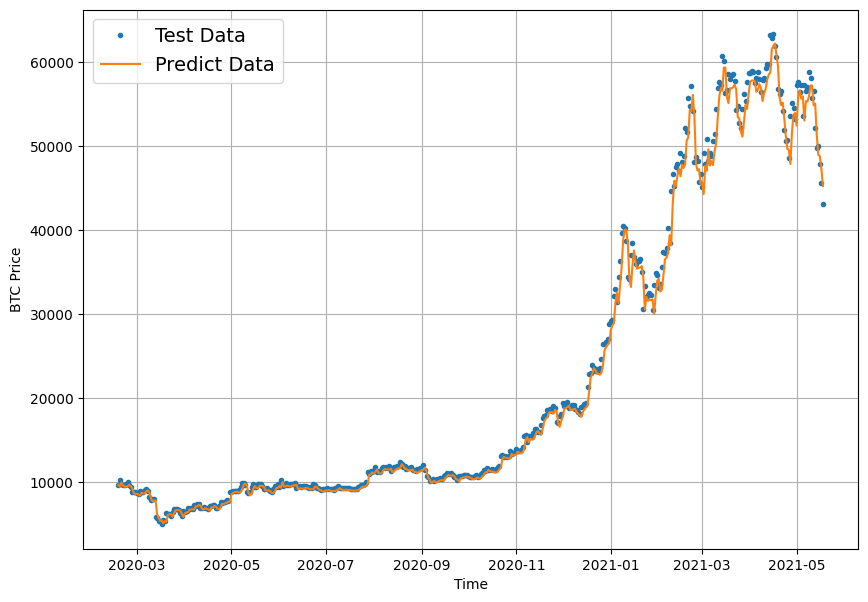

In [55]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_1_preds,start = offset,label = "Predict Data",format = "-")

## Model 2: Dense(Window = 30,Horizon = 1)

In [56]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 1)

In [57]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [58]:
model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(1,activation = "linear"),
],name = "model_2_dense")
model_2.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [59]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 4686.9629 - mae: 4686.9629

18/18 [==============================] - 1s 34ms/step - loss: 1596.6738 - mae: 1596.6738 - val_loss: 5344.3867 - val_mae: 5344.3867
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 952.5476 - mae: 952.5476

18/18 [==============================] - 0s 28ms/step - loss: 448.3729 - mae: 448.3729 - val_loss: 1581.1075 - val_mae: 1581.1075
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 263.7682 - mae: 263.7682

18/18 [==============================] - 0s 26ms/step - loss: 289.5413 - mae: 289.5413 - val_loss: 1485.8845 - val_mae: 1485.8845
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 254.2241 - mae: 254.2241

18/18 [==============================] - 0s 27ms/step - loss: 254.2241 - mae: 254.2241 - val_loss: 1412.8385 - val_mae: 1412.8385
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 213.3890 - mae: 213.3890

18/18 [==============================] - 0s 26ms/step - loss: 222.3823 - mae: 222.3823 - val_loss: 1224.4022 - val_mae: 1224.4022
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 244.7260 - mae: 244.7260

18/18 [==============================] - 0s 26ms/step - loss: 222.7820 - mae: 222.7820 - val_loss: 1158.9221 - val_mae: 1158.9221
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 177.7072 - mae: 177.7072

18/18 [==============================] - 0s 27ms/step - loss: 206.2794 - mae: 206.2794 - val_loss: 1143.8027 - val_mae: 1143.8027
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 195.4021 - mae: 195.4021

18/18 [==============================] - 0s 28ms/step - loss: 196.6314 - mae: 196.6314 - val_loss: 1115.6436 - val_mae: 1115.6436
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 194.2542 - mae: 194.2542

18/18 [==============================] - 0s 27ms/step - loss: 198.9284 - mae: 198.9284 - val_loss: 1084.3888 - val_mae: 1084.3888
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 226.1718 - mae: 226.1718

18/18 [==============================] - 0s 26ms/step - loss: 192.6595 - mae: 192.6595 - val_loss: 1069.6884 - val_mae: 1069.6884
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 186.7672 - mae: 186.7672 - val_loss: 1337.0393 - val_mae: 1337.0393
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 201.8640 - mae: 201.8640

18/18 [==============================] - 0s 27ms/step - loss: 201.8640 - mae: 201.8640 - val_loss: 1017.2308 - val_mae: 1017.2308
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 164.3263 - mae: 164.3263

18/18 [==============================] - 1s 33ms/step - loss: 192.0189 - mae: 192.0189 - val_loss: 1007.6421 - val_mae: 1007.6421
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 183.2558 - mae: 183.2558 - val_loss: 1144.2567 - val_mae: 1144.2567
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 176.5315 - mae: 176.5315 - val_loss: 1054.6517 - val_mae: 1054.6517
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 172.9398 - mae: 172.9398

18/18 [==============================] - 1s 56ms/step - loss: 174.9024 - mae: 174.9024 - val_loss: 966.9590 - val_mae: 966.9590
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 180.8086 - mae: 180.8086 - val_loss: 1449.6305 - val_mae: 1449.6305
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 191.0409 - mae: 191.0409 - val_loss: 1125.4958 - val_mae: 1125.4958
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 179.0587 - mae: 179.0587 - val_loss: 1049.1862 - val_mae: 1049.1862
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 168.8127 - mae: 168.8127

18/18 [==============================] - 1s 31ms/step - loss: 171.3203 - mae: 171.3203 - val_loss: 898.2936 - val_mae: 898.2936
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 173.3810 - mae: 173.3810 - val_loss: 1344.0414 - val_mae: 1344.0414
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 196.4357 - mae: 196.4357 - val_loss: 904.7728 - val_mae: 904.7728
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 162.3958 - mae: 162.3958 - val_loss: 1249.3707 - val_mae: 1249.3707
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 161.7294 - mae: 161.7294 - val_loss: 898.8658 - val_mae: 898.8658
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 153.7665 - mae: 153.7665 - val_loss: 899.8586 - val_mae: 899.8586
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 142.5327 - mae: 142.5327

18/18 [==============================] - 0s 26ms/step - loss: 155.3490 - mae: 155.3490 - val_loss: 835.8450 - val_mae: 835.8450
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 149.1218 - mae: 149.1218 - val_loss: 864.1946 - val_mae: 864.1946
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 110.0595 - mae: 110.0595

18/18 [==============================] - 0s 26ms/step - loss: 161.9226 - mae: 161.9226 - val_loss: 816.4731 - val_mae: 816.4731
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 152.8702 - mae: 152.8702 - val_loss: 1312.1068 - val_mae: 1312.1068
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 175.3164 - mae: 175.3164 - val_loss: 1157.8059 - val_mae: 1157.8059
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 167.8815 - mae: 167.8815 - val_loss: 844.6515 - val_mae: 844.6515
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 149.1727 - mae: 149.1727 - val_loss: 896.2293 - val_mae: 896.2293
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 147.5819 - mae: 147.5819 - val_loss: 919.2329 - val_mae: 919.2329
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 143.0115 - mae: 143.0115 - val_loss: 898.5375 - val_mae: 898.5375
Epoch 35/100
 1/18 [>.......

18/18 [==============================] - 0s 27ms/step - loss: 143.0282 - mae: 143.0282 - val_loss: 760.4184 - val_mae: 760.4184
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7523 - mae: 126.7523

18/18 [==============================] - 0s 27ms/step - loss: 138.9048 - mae: 138.9048 - val_loss: 753.6520 - val_mae: 753.6520
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 137.3507 - mae: 137.3507 - val_loss: 776.0277 - val_mae: 776.0277
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9386 - mae: 158.9386

18/18 [==============================] - 0s 25ms/step - loss: 138.7883 - mae: 138.7883 - val_loss: 739.3121 - val_mae: 739.3121
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 151.8403 - mae: 151.8403

18/18 [==============================] - 0s 27ms/step - loss: 140.6439 - mae: 140.6439 - val_loss: 735.9301 - val_mae: 735.9301
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 134.4597 - mae: 134.4597 - val_loss: 1061.3646 - val_mae: 1061.3646
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 157.1659 - mae: 157.1659

18/18 [==============================] - 0s 27ms/step - loss: 151.9561 - mae: 151.9561 - val_loss: 734.9591 - val_mae: 734.9591
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 116.8311 - mae: 116.8311

18/18 [==============================] - 0s 26ms/step - loss: 137.8056 - mae: 137.8056 - val_loss: 732.7218 - val_mae: 732.7218
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 144.8286 - mae: 144.8286 - val_loss: 853.0159 - val_mae: 853.0159
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 191.8253 - mae: 191.8253

18/18 [==============================] - 0s 27ms/step - loss: 166.1147 - mae: 166.1147 - val_loss: 718.8102 - val_mae: 718.8102
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 136.6867 - mae: 136.6867 - val_loss: 722.6482 - val_mae: 722.6482
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 136.1144 - mae: 136.1144 - val_loss: 811.1742 - val_mae: 811.1742
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 153.5468 - mae: 153.5468

18/18 [==============================] - 0s 27ms/step - loss: 136.2827 - mae: 136.2827 - val_loss: 701.0239 - val_mae: 701.0239
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 129.3980 - mae: 129.3980 - val_loss: 836.4299 - val_mae: 836.4299
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 146.1085 - mae: 146.1085 - val_loss: 979.1111 - val_mae: 979.1111
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 190.9033 - mae: 190.9033 - val_loss: 965.1135 - val_mae: 965.1135
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 148.8986 - mae: 148.8986

18/18 [==============================] - 0s 26ms/step - loss: 145.4563 - mae: 145.4563 - val_loss: 690.2885 - val_mae: 690.2885
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 131.2354 - mae: 131.2354 - val_loss: 695.9974 - val_mae: 695.9974
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 131.6608 - mae: 131.6608 - val_loss: 815.0004 - val_mae: 815.0004
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 152.5359 - mae: 152.5359 - val_loss: 1518.6868 - val_mae: 1518.6868
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 208.7935 - mae: 208.7935 - val_loss: 695.0026 - val_mae: 695.0026
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 182.2235 - mae: 182.2235 - val_loss: 879.2371 - val_mae: 879.2371
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 154.8749 - mae: 154.8749 - val_loss: 1218.0330 - val_mae: 1218.0330
Epoch 58/100
 1/18 [>.......

18/18 [==============================] - 0s 26ms/step - loss: 177.8666 - mae: 177.8666 - val_loss: 687.8895 - val_mae: 687.8895
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 153.3446 - mae: 153.3446

18/18 [==============================] - 0s 26ms/step - loss: 153.7887 - mae: 153.7887 - val_loss: 678.0177 - val_mae: 678.0177
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 124.1677 - mae: 124.1677 - val_loss: 722.4614 - val_mae: 722.4614
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 125.9453 - mae: 125.9453 - val_loss: 705.2452 - val_mae: 705.2452
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 127.5419 - mae: 127.5419 - val_loss: 1056.3372 - val_mae: 1056.3372
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 148.2862 - mae: 148.2862 - val_loss: 735.5121 - val_mae: 735.5121
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7593 - mae: 121.7593 - val_loss: 754.2245 - val_mae: 754.2245
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5320 - mae: 125.5320 - val_loss: 766.2856 - val_mae: 766.2856
Epoch 66/100
18/18 [==========

18/18 [==============================] - 0s 27ms/step - loss: 124.1906 - mae: 124.1906 - val_loss: 671.6382 - val_mae: 671.6382
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 122.9341 - mae: 122.9341 - val_loss: 701.8868 - val_mae: 701.8868
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 129.0978 - mae: 129.0978 - val_loss: 943.1595 - val_mae: 943.1595
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 131.5686 - mae: 131.5686 - val_loss: 829.1926 - val_mae: 829.1926
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 125.3237 - mae: 125.3237 - val_loss: 762.5719 - val_mae: 762.5719
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 146.5520 - mae: 146.5520 - val_loss: 957.2249 - val_mae: 957.2249
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 172.0431 - mae: 172.0431 - val_loss: 802.3022 - val_mae: 802.3022
Epoch 74/100
18/18 [============

18/18 [==============================] - 1s 58ms/step - loss: 121.3814 - mae: 121.3814 - val_loss: 657.7286 - val_mae: 657.7286
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 124.6347 - mae: 124.6347 - val_loss: 949.3887 - val_mae: 949.3887
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 132.9587 - mae: 132.9587 - val_loss: 703.5638 - val_mae: 703.5638
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1492 - mae: 121.1492 - val_loss: 666.3533 - val_mae: 666.3533
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 141.3644 - mae: 141.3644

18/18 [==============================] - 0s 28ms/step - loss: 140.4574 - mae: 140.4574 - val_loss: 655.3640 - val_mae: 655.3640
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 125.7048 - mae: 125.7048 - val_loss: 969.6447 - val_mae: 969.6447
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 132.9662 - mae: 132.9662 - val_loss: 749.0213 - val_mae: 749.0213
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4200 - mae: 119.4200 - val_loss: 775.0634 - val_mae: 775.0634
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 128.4234 - mae: 128.4234 - val_loss: 766.0878 - val_mae: 766.0878
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 132.7022 - mae: 132.7022 - val_loss: 655.6221 - val_mae: 655.6221
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2923 - mae: 119.2923 - val_loss: 861.4310 - val_mae: 861.4310
Epoch 86/100
18/18 [============

18/18 [==============================] - 0s 26ms/step - loss: 137.7421 - mae: 137.7421 - val_loss: 648.1476 - val_mae: 648.1476
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 120.5258 - mae: 120.5258 - val_loss: 700.7717 - val_mae: 700.7718
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0411 - mae: 121.0411 - val_loss: 685.2899 - val_mae: 685.2899
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8797 - mae: 125.8797 - val_loss: 965.2014 - val_mae: 965.2014
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 154.5578 - mae: 154.5578 - val_loss: 1126.4509 - val_mae: 1126.4509
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 159.0045 - mae: 159.0045 - val_loss: 859.4281 - val_mae: 859.4282
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 159.9526 - mae: 159.9526 - val_loss: 861.7226 - val_mae: 861.7226
Epoch 96/100
18/18 [==========

18/18 [==============================] - 0s 26ms/step - loss: 125.8140 - mae: 125.8140 - val_loss: 633.0848 - val_mae: 633.0848
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 131.6066 - mae: 131.6066 - val_loss: 674.1026 - val_mae: 674.1026


In [60]:
model_2_preds = make_preds(model_2,test_windows)

18/18 [==============================] - 0s 2ms/step


In [61]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_2_preds)

{'mae': 674.1026,
 'mse': 1491471.1,
 'rmse': 1221.2579,
 'mape': 3.1053038,
 'mase': 1.1783379}

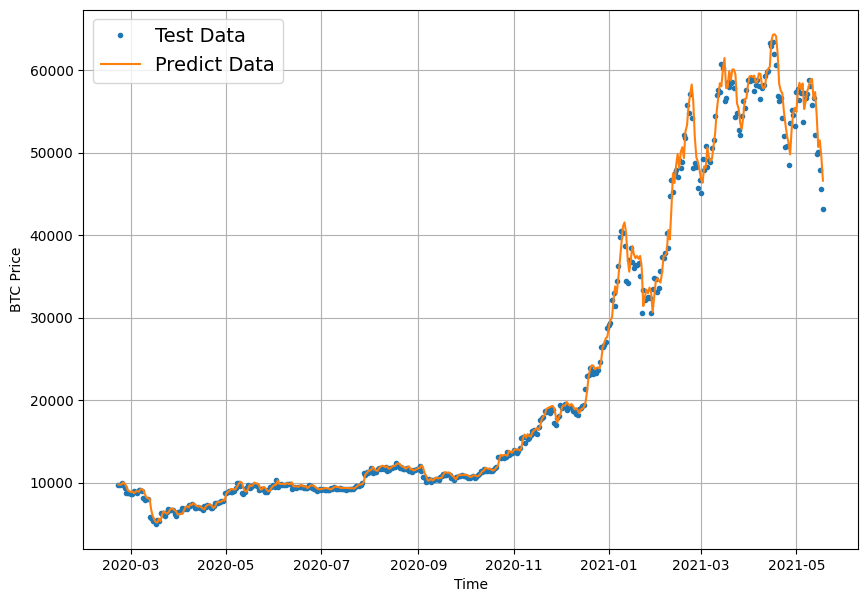

In [62]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_2_preds,start = offset,label = "Predict Data",format = "-")

## Model 3: Dense(Windows = 30,Horizon = 7)

In [63]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 7)

In [64]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [75]:

tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [76]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 622.6932


622.6931762695312

In [79]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8688.393 , 8875.066 , 8727.366 , 8430.25  , 8592.386 , 8841.7705,
        8827.995 ],
       [8447.76  , 8750.686 , 8772.998 , 8464.571 , 8633.574 , 8834.22  ,
        8637.36  ],
       [8304.455 , 8703.393 , 8612.214 , 8319.891 , 8698.192 , 8686.585 ,
        8488.371 ],
       [8371.736 , 8632.709 , 8539.075 , 8464.183 , 8622.066 , 8447.422 ,
        8461.263 ],
       [8400.801 , 8495.529 , 8403.441 , 8509.024 , 8467.017 , 8418.659 ,
        8353.946 ]], dtype=float32)>

## Model 4: Conv1D

In [80]:
full_windows,full_labels = make_windows(prices,window_size = 7,horizon = 1)

In [81]:
len(full_windows),len(full_labels)

(2780, 2780)

In [83]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [87]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4_results = model_4_results.evaluate(test_windows, test_labels)

In [ ]:
model_4_results = evaluation_metrics(tf.squeeze(test_labels),y_pred = model_4_preds)